In [2]:
pwd

'C:\\Users\\reza\\Documents\\GitHub\\BicycleCounter'

In [3]:
%autosave 180

Autosaving every 180 seconds


# Exploratory Analysis To Reproducible Science

# Load Data

---
- We can get the below `URL` directly from [Fremont_Bike_Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
- Move to `Export / Download` then `Right Click` on `CSV` and `Copy Link Address`. Now We save it in our `Jupyter Notebook` so that we are able to retrieve data again.

In [4]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [5]:
# We need to download that data, it is a one way!!

from urllib.request import urlretrieve
urlretrieve(URL, "FremontBike.csv")            # We save data as `FremontBike.csv`.      

('FremontBike.csv', <http.client.HTTPMessage at 0x1e526f2ef98>)

In [6]:
# It is a `UNIX` command in the notebook that we see we have the file right there.

!head FremontBike.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
11/01/2019 12:00:00 AM,12,7,5
11/01/2019 01:00:00 AM,7,0,7
11/01/2019 02:00:00 AM,1,0,1
11/01/2019 03:00:00 AM,6,6,0
11/01/2019 04:00:00 AM,6,5,1
11/01/2019 05:00:00 AM,20,9,11
11/01/2019 06:00:00 AM,97,43,54
11/01/2019 07:00:00 AM,299,120,179
11/01/2019 08:00:00 AM,583,261,322


In [7]:
# we know a common way to download data.

import pandas as pd
bike_data = pd.read_csv("FremontBike.csv")
bike_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [8]:
bike_data.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [9]:
# Set the index column to `Date`. data is not indexed by row column.

import pandas as pd 
bike_data = pd.read_csv("FremontBike.csv", index_col = 'Date')
bike_data.head()                        

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
11/01/2019 12:00:00 AM,12.0,7.0,5.0
11/01/2019 01:00:00 AM,7.0,0.0,7.0
11/01/2019 02:00:00 AM,1.0,0.0,1.0
11/01/2019 03:00:00 AM,6.0,6.0,0.0
11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [25]:
# The `Date` are currently strings. So we would like `Pandas` to `Parse` the dates automatically 
# and turn them into dates.

import pandas as pd 
bike_data = pd.read_csv("FremontBike.csv", index_col = 'Date', parse_dates = True)
bike_data.head(24)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


In [20]:
bike_data.tail()

,Total,East,West
Date,,,
2021-05-31 19:00:00,147.0,62.0,85.0
2021-05-31 20:00:00,83.0,44.0,39.0
2021-05-31 21:00:00,56.0,21.0,35.0
2021-05-31 22:00:00,33.0,17.0,16.0
2021-05-31 23:00:00,21.0,7.0,14.0


In [24]:
bike_data.shape

(142166, 3)

---
- **Be careful** date on our data is not `in order of year.`

# Initial Visualize Data

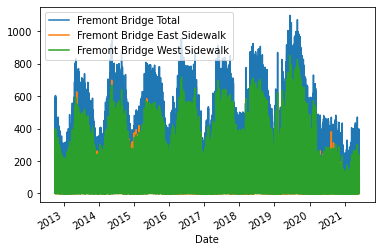

In [11]:
%matplotlib inline 
# This command tells the notebook to put any plugs in the notebook itself rather than in separate
# windows.
bike_data.plot();

# We see this plot is a little dense`. These are hourly counts over the course of four years. So
# It's a little bit too many data points for a little plot.

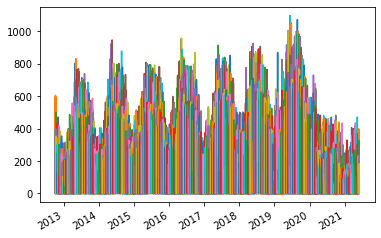

In [12]:
# To see that plot a little better we can resample `Weekly`. 

bike_data.resample('W').plot();

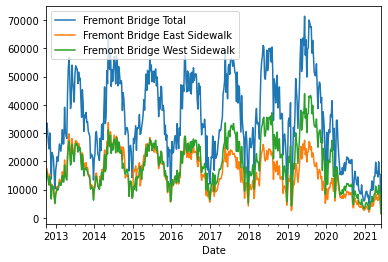

In [13]:
# To see that plot a little bit more better we can resample `Weekly` and take the `Sum`.
# We are going to get the total number of rides each week over the course of these years on the
# side and west sidewalk.

bike_data.resample("W").sum().plot();

In [14]:
# The plot above gives us some insight into the data and where we can start exploring.
# Maybe about 8000 / 12000 trips a week during the glumy dark winter months.
# Maybe about 28000 / 30000 trips a week during the warmer summer months.

# Deep Data Visualization

---
- We are going to dive a little bit `deeper into data visualization` and take a look at some features of the data. We will start looking into how to make `our analysis reproducible` using the tools provided by Jupyter and Python.

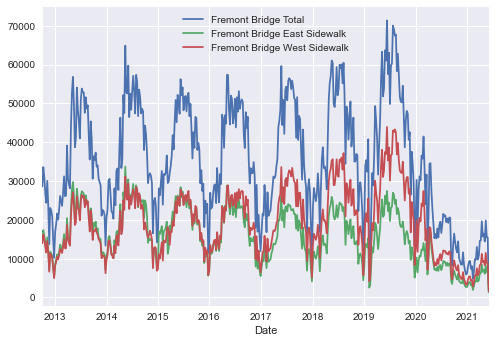

In [15]:
# First change of the style of the plots a little bit. The default matplotlib is not good.
# `style` modjule will help us to have a gray background with the gridlines and different colors.


import matplotlib.pyplot as plt
plt.style.use("seaborn")
bike_data.resample("W").sum().plot();

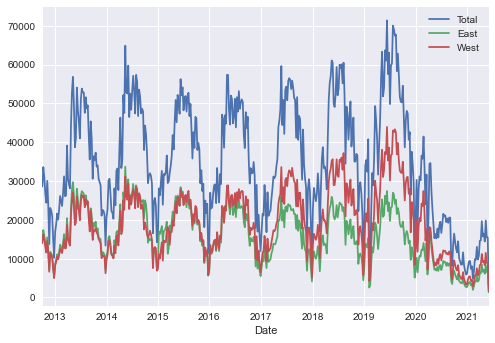

In [28]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# The legegend is a little bit verbose so we can make the name of columns a little bit shorter. 

bike_data.columns = ["Total", "East", "West"]
bike_data.resample("W").sum().plot();

In [17]:
# There is sort of annual trend in the number of riders.
# There is any sort of annual growth or decline and ridership.

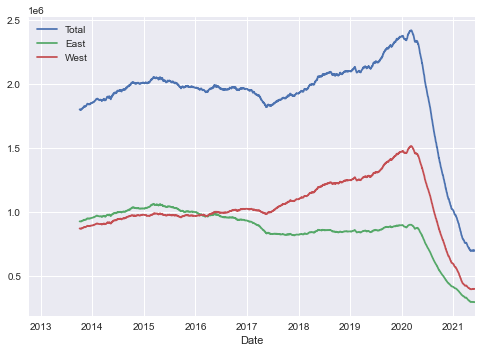

In [18]:
bike_data.resample("D").sum().rolling(365).sum().plot();

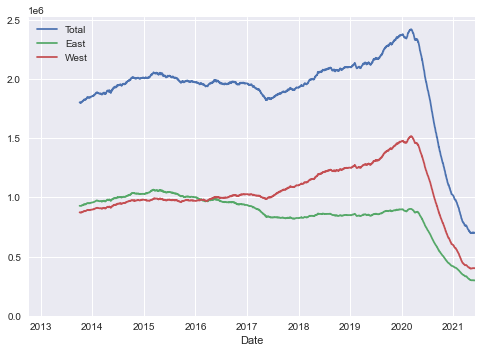

In [19]:
# One way we can do, we can use `rolling window`. We resample daily (D) rolling 365, rolling sum
# of over 365 days of all the data.

ax = bike_data.resample("D").sum().rolling(365).sum().plot()

# What comes out there is kind of the annual trend, each of these points is the sum of rides in 
# the prtevious 365 days.

# On the `East` side things got increased until early 2016 and sort of decreased step to that.
# On the `West` side things got increased until early 2020 and keep being high until now.
# There seems to be an offset between west side walk and east side walk.
# Somehow the east side and the west side of the bridge have kind of flipped a little bit the
# trends are reversed. Also mention the total is not consistency.

# The axes limits are a little bit suspect because they don't go all the way to zero. It might be
# better if we can set y-axis limit.

ax.set_ylim(0, None);            # `None` tells to use the current maximum.

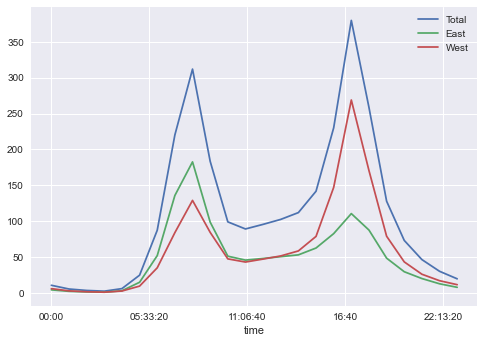

In [36]:
# We are going to take a look at the trend whitin individual days.
# We groupby the time of day, hours in a day, and take the mean.

bike_data.groupby(bike_data.index.time).mean().plot();

In [ ]:
# What the plot says is the over each time of day throughout the year, through all the days we
# average the number of crossings of each time of day and we can see some interesting patterns:
# The westbound sidewalk seems to peak in the afternoon and the eastbound sidewalk seems to peak
# in the morning. Two peaks are kind of indicative of a commute pattern. It is going to tell us
# that people are going into the city on the east side walk in the morning and out of the city on
# the west side walk of the city in the afternoon generally.

In [33]:
# Let's see whole dataset in this way;
# First make a pivoted dataset, pass total count, set index to be our data indexed time and 
# columns to be our data indexed dates.

pivoted = bike_data.pivot_table("Total",
                                index = bike_data.index.time, 
                                columns = bike_data.index.date)


pivoted.iloc[ : 5, : 5]           # Look at the first 5 by 5 block.

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


---
- Once we run **pivoted** it will show an `entire block(24(day hours) by 3163(days of years)).` -- `October, November and December of 2012` plus `8 years(2013 to 2020)` plus `first 5 months of 2021` add up 3163 days that are our pivot table columns.
- We have a two dimensional dataframe where each column is a day in the dataset and each row correspondsto an hour during that day.

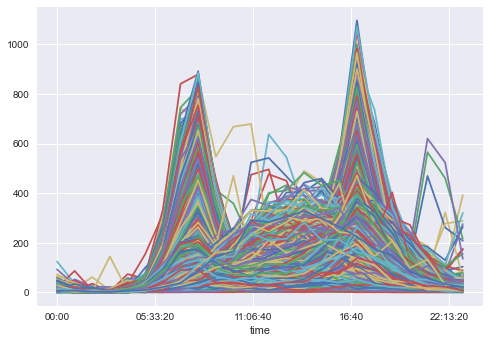

In [34]:
# Take a look at this case plot,

pivoted.plot(legend = False);         # We don't want `legend`.

# We have a line for each day of the year or each day in the four years.

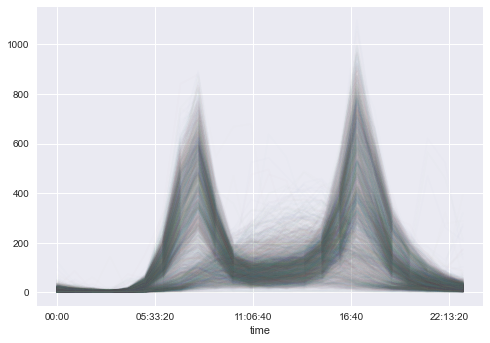

In [35]:
# We are going to plot a whole bunch of transparent lines on top of each other to get an idea how
# the trend in crossings over the day changes throughout this nine year period.
# We pass `alpha` that is the transparency.

pivoted.plot(legend = False, alpha = 0.01);

# There is a bunch of days that have this kind of bimodal commute pattern.
# There is also a bunch of days that don't have a commute pattern.
# The best hypothesis here is the commute days would be weekdays and broad usage days would be 
# weekends or holidays.